In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
K.set_session( tf.Session() )

---
## dataset.from_tensor_slices

In [3]:
def print_dataset(dataset):
    print( K.get_value( dataset.make_one_shot_iterator().get_next() ) )

np.darray型のdataset作成可能

In [4]:
dataset = tf.data.Dataset.from_tensor_slices( np.arange(5) )
print_dataset(dataset)
dataset

0


<DatasetV1Adapter shapes: (), types: tf.int32>

list型のdataset作成可能

In [5]:
dataset = tf.data.Dataset.from_tensor_slices( [1]*5 )
print_dataset(dataset)
dataset

1


<DatasetV1Adapter shapes: (), types: tf.int32>

tuple型のdataset作成は不可能。TypeErrorが発生する。

In [6]:
try:
    dataset = tf.data.Dataset.from_tensor_slices( range(5) )
except Exception as e:
    print('raised', type(e) )

raised <class 'TypeError'>


str型を要素に含んだlist型のdataset作成可能。  
※文字列を使う際はdecode()が必要

In [7]:
dataset = tf.data.Dataset.from_tensor_slices( ['image{0}.tif'.format(i) for i in range(5) ] )
print_dataset(dataset)
dataset

b'image0.tif'


<DatasetV1Adapter shapes: (), types: tf.string>

---
## dataset.make_one_shot_iterator

作成したdatassetの要素にアクセスするために、iteratorを使用する。

In [8]:
x = np.arange(5, dtype=np.float32)

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<DatasetV1Adapter shapes: (), types: tf.float32>

iteratorはdataset.make_one_shot_iterator()で生成できる。  
iteratorの要素はtf.Tensor型である。  
要素の実体(中身)を直接出力するには、K.get_value()やsess.run()、Tensor.eval()が必要。

In [10]:
iterator = dataset.make_one_shot_iterator()
item = iterator.get_next()
item

<tf.Tensor 'IteratorGetNext_3:0' shape=() dtype=float32>

In [11]:
K.get_value(item)

0.0

In [12]:
with tf.Session() as sess:
    value_item = sess.run(item)
    print(value_item)

0.0


In [13]:
with tf.Session() as sess:
    print(item.eval())

0.0


`dataset.repeat()`を実行せずにiteratorを実行し続けると、`OutOfRangeError`が発生する。

In [14]:
iterator = dataset.make_one_shot_iterator()
try:
    for i in range(6):
        print( 'i={0:2d} iterator={1}'.format(i, K.get_value(iterator.get_next()) ) )
except Exception as e:
    print('raised', type(e) )

i= 0 iterator=0.0
i= 1 iterator=1.0
i= 2 iterator=2.0
i= 3 iterator=3.0
i= 4 iterator=4.0
raised <class 'tensorflow.python.framework.errors_impl.OutOfRangeError'>


datasetから定期的にiteratorを作成すると、先頭を指すiteratorを取得できる。

In [15]:
iterator = dataset.make_one_shot_iterator()
print( K.get_value( iterator.get_next() ) )

iterator = dataset.make_one_shot_iterator()
print( K.get_value( iterator.get_next() ) )

0.0
0.0


## dataset.repeat()

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

`dataset.repeat()`を実行すると、iteratorがring状になる。

In [17]:
for i in range(10):
    print( 'i={0:2d} iterator={1}'.format(i, K.get_value(iterator.get_next()) ) )

i= 0 iterator=0.0
i= 1 iterator=1.0
i= 2 iterator=2.0
i= 3 iterator=3.0
i= 4 iterator=4.0
i= 5 iterator=0.0
i= 6 iterator=1.0
i= 7 iterator=2.0
i= 8 iterator=3.0
i= 9 iterator=4.0


## dataset.shuffle()

datasetの要素をランダムに入れ替える関数`dataset.repeat()`を使用する。  
`buffer_size`は入れ替える要素数であり、必須の引数である。

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.shuffle(buffer_size=5)
iterator = dataset.make_one_shot_iterator()
for i in range(5):
    print( 'i={0:2d} iterator={1}'.format(i, K.get_value(iterator.get_next()) ) )

i= 0 iterator=2.0
i= 1 iterator=4.0
i= 2 iterator=1.0
i= 3 iterator=3.0
i= 4 iterator=0.0


iteratorの要素数より大きい値を設定してもエラーは発生しない。

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.shuffle(buffer_size=1000)
iterator = dataset.make_one_shot_iterator()
for i in range(5):
    print( 'i={0:2d} iterator={1}'.format(i, K.get_value(iterator.get_next()) ) )

i= 0 iterator=4.0
i= 1 iterator=3.0
i= 2 iterator=0.0
i= 3 iterator=2.0
i= 4 iterator=1.0


要素数より小さな値をbuffer_sizeに設定しても、要素全体が並び替えられるが、  
buffer_sizeは並び替える範囲を指すようであり、小さな値を設定する場合、設計意図が求められる。  
※例：教示データをlossが大きい順に並び替えて、誤差が大きい先頭だけを学習に使いたい場合。

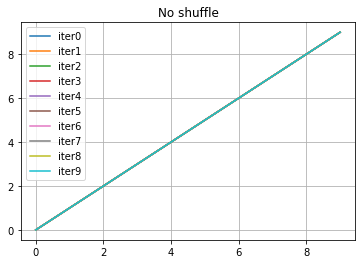

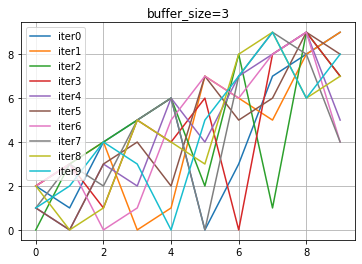

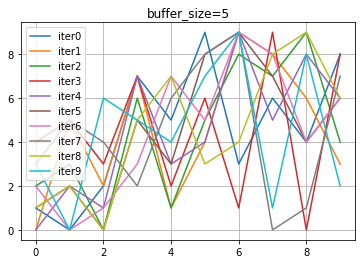

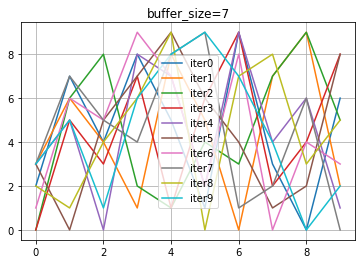

In [34]:
def get_and_plot_value( dataset, iter=10 ):
    for i in range(iter):
        iterator = dataset.make_one_shot_iterator()
        items = [ K.get_value(iterator.get_next()) for _ in range(num)  ]
        plt.plot(items, label='iter{0}'.format(i))

num = 10
# shuffleなし
plt.title('No shuffle')
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
get_and_plot_value(dataset)
plt.grid()
plt.legend()
plt.show()

plt.title('buffer_size=3')
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.shuffle(buffer_size=3)
get_and_plot_value(dataset)
plt.grid()
plt.legend()
plt.show()

plt.title('buffer_size=5')
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.shuffle(buffer_size=5)
get_and_plot_value(dataset)
plt.grid()
plt.legend()
plt.show()

plt.title('buffer_size=7')
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.shuffle(buffer_size=7)
get_and_plot_value(dataset)
plt.grid()
plt.legend()
plt.show()

---
### dataset.batch()

`dataset.batch()`によりdatasetの各要素を結合して取得することができる。

In [35]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.batch(5)

iterator = dataset.make_one_shot_iterator()
print( K.get_value( iterator.get_next() ) )

[0 1 2 3 4]


`dataset.repeat()`を適用することにより、データの取得を繰り返すことができる。

In [36]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.repeat()
dataset = dataset.batch(6)
iterator = dataset.make_one_shot_iterator()

for _ in range(4):
    print( K.get_value( iterator.get_next() ) )

[0 1 2 3 4 5]
[6 7 8 9 0 1]
[2 3 4 5 6 7]
[8 9 0 1 2 3]


shuffleする場合、`dataset.shuffle()`→`dataset.repeat()`→`dataset.batch()`が良い。

In [21]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.shuffle(num)
dataset = dataset.repeat()
dataset = dataset.batch(5)
iterator = dataset.make_one_shot_iterator()

for _ in range(4):
    print( K.get_value( iterator.get_next() ) )

[3 9 1 4 8]
[0 6 7 5 2]
[3 8 7 2 0]
[4 5 6 1 9]


※WARNING※  
`dataset.repeat()`→`dataset.shuffle()`→`dataset.batch()`の順では、一つのミニバッチ内に同一のデータが混入する。  
更新のデータに偏りが出てしまうため、学習性能に良い影響を与えない。

In [25]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.repeat()
dataset = dataset.shuffle(num)
dataset = dataset.batch(7)
iterator = dataset.make_one_shot_iterator()

for _ in range(4):
    print( K.get_value( iterator.get_next() ) )

[8 6 1 3 0 4 3]
[6 5 7 8 9 0 9]
[3 4 1 0 2 7 2]
[0 5 7 1 2 8 6]


※NG※  
`dataset.batch()`→`dataset.repeat()`の順に処理すると、ミニバッチに区切られた後、ミニバッチがrepeatされる。  
そのため、`iterator.get_next()`で取得されるデータはepoch単位で区切られ、  
サイズが異なるミニバッチが発生してしまう(学習精度に影響する)。  

In [4]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.batch(6)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

for _ in range(4):
    print( K.get_value( iterator.get_next() ) )

[0 1 2 3 4 5]
[6 7 8 9]
[0 1 2 3 4 5]
[6 7 8 9]


※NG※  
また、`dataset.batch()`→`dataset.repeat()`→`dataset.shuffle()`とすると、  
サイズが異なるミニバッチをシャッフルすることになってしまう。

In [6]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.batch(6)
dataset = dataset.repeat()
dataset = dataset.shuffle(10)
iterator = dataset.make_one_shot_iterator()

for _ in range(6):
    print( K.get_value( iterator.get_next() ) )

[6 7 8 9]
[0 1 2 3 4 5]
[6 7 8 9]
[0 1 2 3 4 5]
[6 7 8 9]
[6 7 8 9]


### dataset.map()

In [26]:
def s_multiply(tensor):
    return 10 * tensor

num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( s_multiply )
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

for _ in range(6):
    print( K.get_value( iterator.get_next() ) )

0
10
20
30
40
50


In [30]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( s_multiply )
dataset = dataset.repeat()
dataset = dataset.shuffle(num)
dataset = dataset.batch(5)
iterator = dataset.make_one_shot_iterator()

for _ in range(6):
    print( K.get_value( iterator.get_next() ) )

[40  0 90 10 10]
[30 50 30 40 20]
[50 60  0 70 70]
[80 20 50 10 80]
[80  0  0 10 20]
[60 60 40 30 70]


並列処理の確認(完全なthread safeにしていないのでご愛嬌)

In [108]:
# 計測用関数・クラスの用意
import datetime, time
import threading
from time import sleep

# Singleton
class Logger:
    __singleton = None
    __new_lock = threading.Lock()
    
    def __new__(cls, *args, **kwargs):
        cls.__new_lock.acquire() # threadロック
        if cls.__singleton is None:
            cls.__singleton = super(Logger, cls).__new__(cls)
        cls.__new_lock.release() # threadロック解除
        return cls.__singleton
    
    def clear_logs(self):
        self.logs = list()

    def add_log(self, log):
        self.logs.append(log)

class Log(object):
    def __init__(self, tag):
        self.tag = tag
        #self.time = datetime.datetime.now()
        self.time = time.time()
        
def s_func(value):
    Logger().add_log( Log('start') )
    sleep(1)
    Logger().add_log( Log('end') )
    return value

logger = Logger()
logger.clear_logs()
s_func(1)
s_func(1)

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

size_of_log :  4
start 1570633026.376691
end 1570633027.3909166
start 1570633027.3909166
end 1570633028.3938742


↓dataset.map()を使用してみたが、`iterator.get_next()`のたびに呼ばれない。  
  TensorにTensor(10)を掛ける演算と出力Tensorを定義するのみ？  
  Tensor演算自体が2threadで動作しているか調査できない。  
  もしかしたら、`dataset.map()`と`py_func`の組み合わせでなら計測できるかも。

In [109]:
def s_func(value):
    Logger().add_log( Log('start') )
    print('value={0}'.format(value))
    sleep(1)
    Logger().add_log( Log('end') )
    return value*10

num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( s_func, num_parallel_calls=2)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

logger = Logger()
logger.clear_logs()
for _ in range(6):
    print( K.get_value( iterator.get_next() ) )

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

value=Tensor("arg0:0", shape=(), dtype=int32)
0
10
20
30
40
50
size_of_log :  0


### datasetの出力要素変更 (dataset.map() & py_func)

In [110]:
def s_func(value):
    Logger().add_log( Log('{0}.start'.format(value)) )
    print('value={0}'.format(value))
    sleep(1)
    Logger().add_log( Log('{0}.end'.format(value)) )
    return value*10, value

num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( lambda x: tf.py_func(s_func, [x], [tf.int32, tf.int32]), num_parallel_calls=1)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

logger = Logger()
logger.clear_logs()
next_elem= iterator.get_next()
for _ in range(6):
    sess = K.get_session()
    print( sess.run( next_elem ))
    #print( K.get_value( next_elem ) )

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

value=0
value=1(0, 0)

value=2(10, 1)

value=3(20, 2)

value=4(30, 3)

value=5(40, 4)

(50, 5)value=6

size_of_log :  13
0.start 1570633042.3256304
0.end 1570633043.351834
1.start 1570633043.351834
1.end 1570633044.3800101
2.start 1570633044.3800101
2.end 1570633045.4107678
3.start 1570633045.4107678
3.end 1570633046.4400847
4.start 1570633046.4400847
4.end 1570633047.4693506
5.start 1570633047.4693506
5.end 1570633048.498218
6.start 1570633048.498218


In [111]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( lambda x: tf.py_func(s_func, [x], [tf.int32, tf.int32]), num_parallel_calls=2)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

logger = Logger()
logger.clear_logs()
next_elem= iterator.get_next()
for _ in range(6):
    sess = K.get_session()
    print( sess.run( next_elem ))
    #print( K.get_value( next_elem ) )

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

value=0value=1

value=2(0, 0)

value=3(10, 1)

value=4(20, 2)

value=5(30, 3)

value=6(40, 4)

value=7(50, 5)
size_of_log :  15
6.end 1570633049.5144186
0.start 1570633049.6980453
1.start 1570633049.713669
1.end 1570633050.7450607
0.end 
1570633050.7450607
2.start 1570633050.7450607
3.start 1570633050.7622335
2.end 1570633051.7628918
4.start 1570633051.7628918
3.end 1570633051.7788854
5.start 1570633051.782881
4.end 1570633052.7811306
6.start 1570633052.7811306
5.end 1570633052.8065636
7.start 1570633052.8065636


value=0value=1

value=2
value=0
value=3
value=1
value=4value=2

(0, 0)value=3

value=5
value=4
value=6
(10, 1)
value=5
value=7(20, 2)

value=6(30, 3)value=8


value=7(40, 4)

value=9
value=8(50, 5)

size_of_log :  34
funcA.0.start 1570633603.063204
funcA.1.start 1570633603.0788345
funcA.0.end 1570633604.1030066
funcA.1.end 1570633604.1030066
funcA.2.start 1570633604.1030066
funcB.0.start 1570633604.1030066
funcA.3.start 1570633604.118574
funcB.1.start 1570633604.1341982
funcA.2.end 1570633605.130197
funcA.4.start 1570633605.130197
funcA.3.end 1570633605.1421947
funcB.2.start 1570633605.1461887
funcB.0.end 1570633605.6306834
funcB.3.start 1570633605.6306834
funcB.1.end 1570633605.6617432
funcA.5.start 1570633605.6617432
funcA.4.end 1570633606.1624289
funcB.4.start 1570633606.1624289
funcB.2.end 1570633606.6622481
funcA.6.start 1570633606.6622481
funcA.5.end 1570633606.6742442
funcB.5.start 1570633606.6782453
funcB.3.end 1570633607.1460652
funcA.7.start 1570633607.1460652
funcA.6.end 157

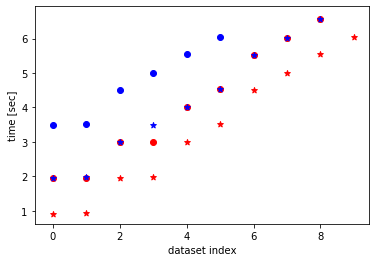

In [117]:
def s_funcA(value):
    Logger().add_log( Log('funcA.{0}.start'.format(value)) )
    print('value={0}'.format(value))
    sleep(1)
    Logger().add_log( Log('funcA.{0}.end'.format(value)) )
    return value

def s_funcB(value):
    Logger().add_log( Log('funcB.{0}.start'.format(value)) )
    print('value={0}'.format(value))
    sleep(1.5)
    Logger().add_log( Log('funcB.{0}.end'.format(value)) )
    return value*10, value


num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( lambda x: tf.py_func(s_funcA, [x], [tf.int32]), num_parallel_calls=2)
dataset = dataset.map( lambda x: tf.py_func(s_funcB, [x], [tf.int32, tf.int32]), num_parallel_calls=3)
dataset = dataset.repeat()
iterator = dataset.make_one_shot_iterator()

logger = Logger()
logger.clear_logs()
next_elem= iterator.get_next()

offset_time = time.time()

for _ in range(6):
    sess = K.get_session()
    print( sess.run( next_elem ))

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

list_funcA_start = [ list(), list() ]
list_funcA_end = [ list(), list() ]
list_funcB_start = [ list(), list() ]
list_funcB_end = [ list(), list() ]

for log in logger.logs:
    if ('funcA' in log.tag) and ('start' in log.tag):
        list_funcA_start[0].append( int(log.tag.split('.')[1]))
        list_funcA_start[1].append( log.time - offset_time )

    if ('funcA' in log.tag) and ('end' in log.tag):
        list_funcA_end[0].append( int(log.tag.split('.')[1]))
        list_funcA_end[1].append( log.time - offset_time )

    if ('funcB' in log.tag) and ('start' in log.tag):
        list_funcB_start[0].append( int(log.tag.split('.')[1]))
        list_funcB_start[1].append( log.time - offset_time )

    if ('funcB' in log.tag) and ('end' in log.tag):
        list_funcB_end[0].append( int(log.tag.split('.')[1]))
        list_funcB_end[1].append( log.time - offset_time )

plt.scatter( list_funcA_start[0], list_funcA_start[1], color='red', marker='*' )
plt.scatter( list_funcA_end[0], list_funcA_end[1], color='red', marker='o' )
plt.scatter( list_funcB_start[0], list_funcB_start[1], color='blue', marker='*' )
plt.scatter( list_funcB_end[0], list_funcB_end[1], color='blue', marker='o' )
plt.xlabel('dataset index')
plt.ylabel('time [sec]')
plt.show()

### dataset.prefetch()

value=0value=1

value=2value=3value=0value=1



value=4value=2

value=3value=5

value=4(0, 0)

value=6value=5

value=7(10, 1)

(20, 2)
(30, 3)
value=6value=8

value=7
value=9
value=8(40, 4)

(50, 5)
size_of_log :  35
funcA.0.start 1570633611.8323405
funcA.1.startvalue=9 1570633611.8443346
funcA.1.end 1570633612.859963
funcA.0.end 1570633612.859963
funcA.2.start 1570633612.859963
funcA.3.start 1570633612.871959
funcB.0.start 1570633612.8839564
funcB.1.start 1570633612.8959477
funcA.3.end 1570633613.911575
funcA.2.end 1570633613.911575
funcA.4.start 1570633613.911575
funcB.2.start 1570633613.927569
funcB.1.end 1570633614.411387
funcB.0.end 1570633614.411387
funcB.3.start 1570633614.411387
funcA.5.start 1570633614.4233856
funcA.4.end 1570633614.9431944
funcB.4.start 
1570633614.9431944
funcA.5.end 1570633615.4390082
funcA.6.start 1570633615.4390082
funcB.2.end 1570633615.4470096
funcB.5.start 1570633615.4510093
funcB.3.end 1570633615.9388285
funcA.7.start 1570633615.9388285
funcB.4.end 15

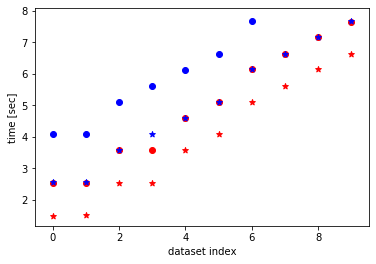

In [118]:
num = 10
dataset = tf.data.Dataset.from_tensor_slices( np.arange(num) )
dataset = dataset.map( lambda x: tf.py_func(s_funcA, [x], [tf.int32]), num_parallel_calls=2)
dataset = dataset.map( lambda x: tf.py_func(s_funcB, [x], [tf.int32, tf.int32]), num_parallel_calls=3)
dataset = dataset.repeat()
dataset = dataset.prefetch(2)
iterator = dataset.make_one_shot_iterator()

logger = Logger()
logger.clear_logs()
next_elem= iterator.get_next()

offset_time = time.time()

for _ in range(6):
    sess = K.get_session()
    print( sess.run( next_elem ))

print('size_of_log : ', len(logger.logs))
for log in logger.logs:
    print(log.tag, log.time)

list_funcA_start = [ list(), list() ]
list_funcA_end = [ list(), list() ]
list_funcB_start = [ list(), list() ]
list_funcB_end = [ list(), list() ]

for log in logger.logs:
    if ('funcA' in log.tag) and ('start' in log.tag):
        list_funcA_start[0].append( int(log.tag.split('.')[1]))
        list_funcA_start[1].append( log.time - offset_time )

    if ('funcA' in log.tag) and ('end' in log.tag):
        list_funcA_end[0].append( int(log.tag.split('.')[1]))
        list_funcA_end[1].append( log.time - offset_time )

    if ('funcB' in log.tag) and ('start' in log.tag):
        list_funcB_start[0].append( int(log.tag.split('.')[1]))
        list_funcB_start[1].append( log.time - offset_time )

    if ('funcB' in log.tag) and ('end' in log.tag):
        list_funcB_end[0].append( int(log.tag.split('.')[1]))
        list_funcB_end[1].append( log.time - offset_time )

plt.scatter( list_funcA_start[0], list_funcA_start[1], color='red', marker='*' )
plt.scatter( list_funcA_end[0], list_funcA_end[1], color='red', marker='o' )
plt.scatter( list_funcB_start[0], list_funcB_start[1], color='blue', marker='*' )
plt.scatter( list_funcB_end[0], list_funcB_end[1], color='blue', marker='o' )
plt.xlabel('dataset index')
plt.ylabel('time [sec]')
plt.show()

### dataset.initiazable_iterator()
一定epoch学習後に、lossなどの指標をもとに学習不足の教示データをiteratorに設定する方法(model.fit()を利用する場合)

参考: https://stackoverflow.com/questions/52691569/keras-model-fit-fed-with-initializable-iterator-of-tf-dataset-object